In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [3]:
df = pd.read_csv('./datasets/df_final_0627.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,CD91물(평균),BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,금값종가,선행지수순환변동치,EPU,장단기금리spread,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.50,25,83.3,1175.45,76.81,99.6,177.148845,0.14,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.50,26,83.3,1175.45,76.81,99.6,177.148845,0.14,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.50,14,83.3,1175.45,76.81,99.6,177.148845,0.14,36800
3,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.50,6,83.3,1175.45,76.81,99.6,177.148845,0.14,67600
4,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.50,26,83.3,1175.45,76.81,99.6,177.148845,0.14,30300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536092,서초구,2022-12-31,152.33,9,2236.399902,4.10,77.2,3698,3.59,3.54,...,4.02,3.25,18,105.0,1260.92,76.11,99.1,169.662386,0.39,250000
536093,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.59,3.54,...,4.02,3.25,34,105.0,1260.92,76.11,99.1,169.662386,0.39,138000
536094,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.59,3.54,...,4.02,3.25,14,105.0,1260.92,76.11,99.1,169.662386,0.39,172000
536095,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.59,3.54,...,4.02,3.25,26,105.0,1260.92,76.11,99.1,169.662386,0.39,37000


# Train/Test Split

In [4]:
# Train : 2016-2020
# Test : 2021-2022

# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

In [5]:
train_df = df.loc[df['계약일'] < '2021']

In [6]:
test_df = df.loc[df['계약일'] >= '2021']

# I. 통계적 검정(스케일링 전)
- train만 진행

In [7]:
# feature & target split

X = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

In [8]:
# X_train : 숫자형 컬럼만 
X_train = X.select_dtypes([np.number])

1. 정규성 - Shapiro & KS
2. 등분산성 - bartlett
3. 독립성 - 더빈 & 왓슨
4. 선형성 - Scatter Plot

In [9]:
# 숫자형 컬럼만 뽑은 x, y 합친 데이터
Xy_df = train_df.select_dtypes([np.number])

## 1. 정규성

### 1-1. 정규성 - Shapiro & KS test

In [10]:
# Shapiro
from scipy import stats
for i in Xy_df.columns:
    a = stats.shapiro(Xy_df[i])
    p = a.pvalue   
    print(i,p)

건물면적(㎡) 0.0
층 0.0
KOSPI종가 0.0
Fed기준금리 0.0
국제유가(Dubai)($/배럴) 0.0
부동산거래량 0.0
국고채5년(평균) 0.0
국고채10년(평균) 0.0
회사채3년(평균) 0.0
CD91물(평균) 0.0
BOK기준금리 0.0
건물연식 0.0
GDP대비가계부채비율 0.0
환율종가 0.0
금값종가 0.0
선행지수순환변동치 0.0
EPU 0.0
장단기금리spread 0.0
물건금액(만원) 0.0


In [11]:
# KS
from scipy.stats import kstest
for i in Xy_df.columns:
    a = kstest(Xy_df[i],'norm')
    p = a.pvalue
    print(i,p)

건물면적(㎡) 0.0
층 0.0
KOSPI종가 0.0
Fed기준금리 0.0
국제유가(Dubai)($/배럴) 0.0
부동산거래량 0.0
국고채5년(평균) 0.0
국고채10년(평균) 0.0
회사채3년(평균) 0.0
CD91물(평균) 0.0
BOK기준금리 0.0
건물연식 0.0
GDP대비가계부채비율 0.0
환율종가 0.0
금값종가 0.0
선행지수순환변동치 0.0
EPU 0.0
장단기금리spread 0.0
물건금액(만원) 0.0


In [12]:
# 잔차 shapiro 
import statsmodels.api as sm
from scipy import stats

# OLS 모델로 회귀분석 수행
model = sm.OLS(y, X_train)
result = model.fit()

# 회귀 모델의 잔차
residuals = result.resid

# Shapiro-Wilk 검정을 통해 잔차의 정규성 검정
shapiro_test = stats.shapiro(residuals)
p_value = shapiro_test.pvalue

print("p-value:", p_value)

p-value: 0.0


In [13]:
# 잔차 ks

# OLS 모델로 회귀분석 수행
model = sm.OLS(y, X_train)
result = model.fit()

# 회귀 모델의 잔차
residuals = result.resid

# kstest 검정을 통해 잔차의 정규성 검정
ks_test = stats.kstest(residuals,'norm')
p_value = ks_test.pvalue

print("p-value:", p_value)

p-value: 0.0


---

### 1-2. 정규성 - QQ plot 

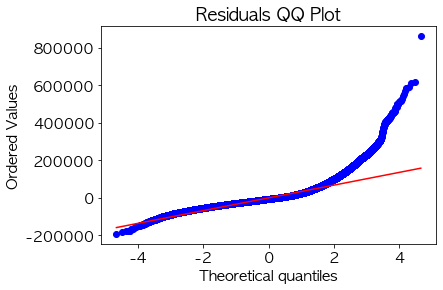

In [14]:
# 잔차 QQplot
import statsmodels.api as sm

# 회귀 모델 피팅
model = sm.OLS(y, sm.add_constant(X_train))
result = model.fit()

# 잔차 계산
residuals = result.resid

# 잔차의 QQ plot 그리기
fig, ax = plt.subplots()
stats.probplot(residuals, dist=stats.norm, plot=ax)
ax.set_title("Residuals QQ Plot")
plt.show()

---

- 정규성 논리 확보 from Shin -> 중심극한정리 
- 스케일링 후 재확인 필요 
    

## 2. 등분산성 - Residual plot

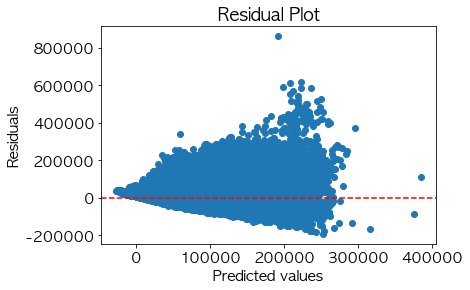

In [15]:
# 선형회귀 모델 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y)

# 예측값과 잔차 계산
y_pred = model.predict(X_train)
residuals = y - y_pred

# 잔차 플롯 시각화
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

- 등분산성 논리 필요 -> 스케일링 후 재확인

## 3. 독립성 - Dubin Watson

In [16]:
## 독립성 검정
import statsmodels.api as sm

data_with_const = sm.add_constant(X_train, has_constant='add')

# 더빈-왓슨 검정
result = sm.OLS(y, data_with_const).fit()
dw_statistic = sm.stats.stattools.durbin_watson(result.resid)

# 결과 출력
print("Durbin-Watson 통계량:", dw_statistic)

# 자기상관 여부 결정
if dw_statistic < 2:
    print("양의 자기상관이 있다.")
elif dw_statistic > 2:
    print("음의 자기상관이 있다.")
else:
    print("자기상관이 없다.")

Durbin-Watson 통계량: 1.9740567165483291
양의 자기상관이 있다.


- 독립성 : 1.97로 정확히 2는 아니지만, 2와 매우 근사하기에 독립성 즉, 자기상관이 없는 것으로 판단 가능

## 4. 선형성 - Scatter Plot

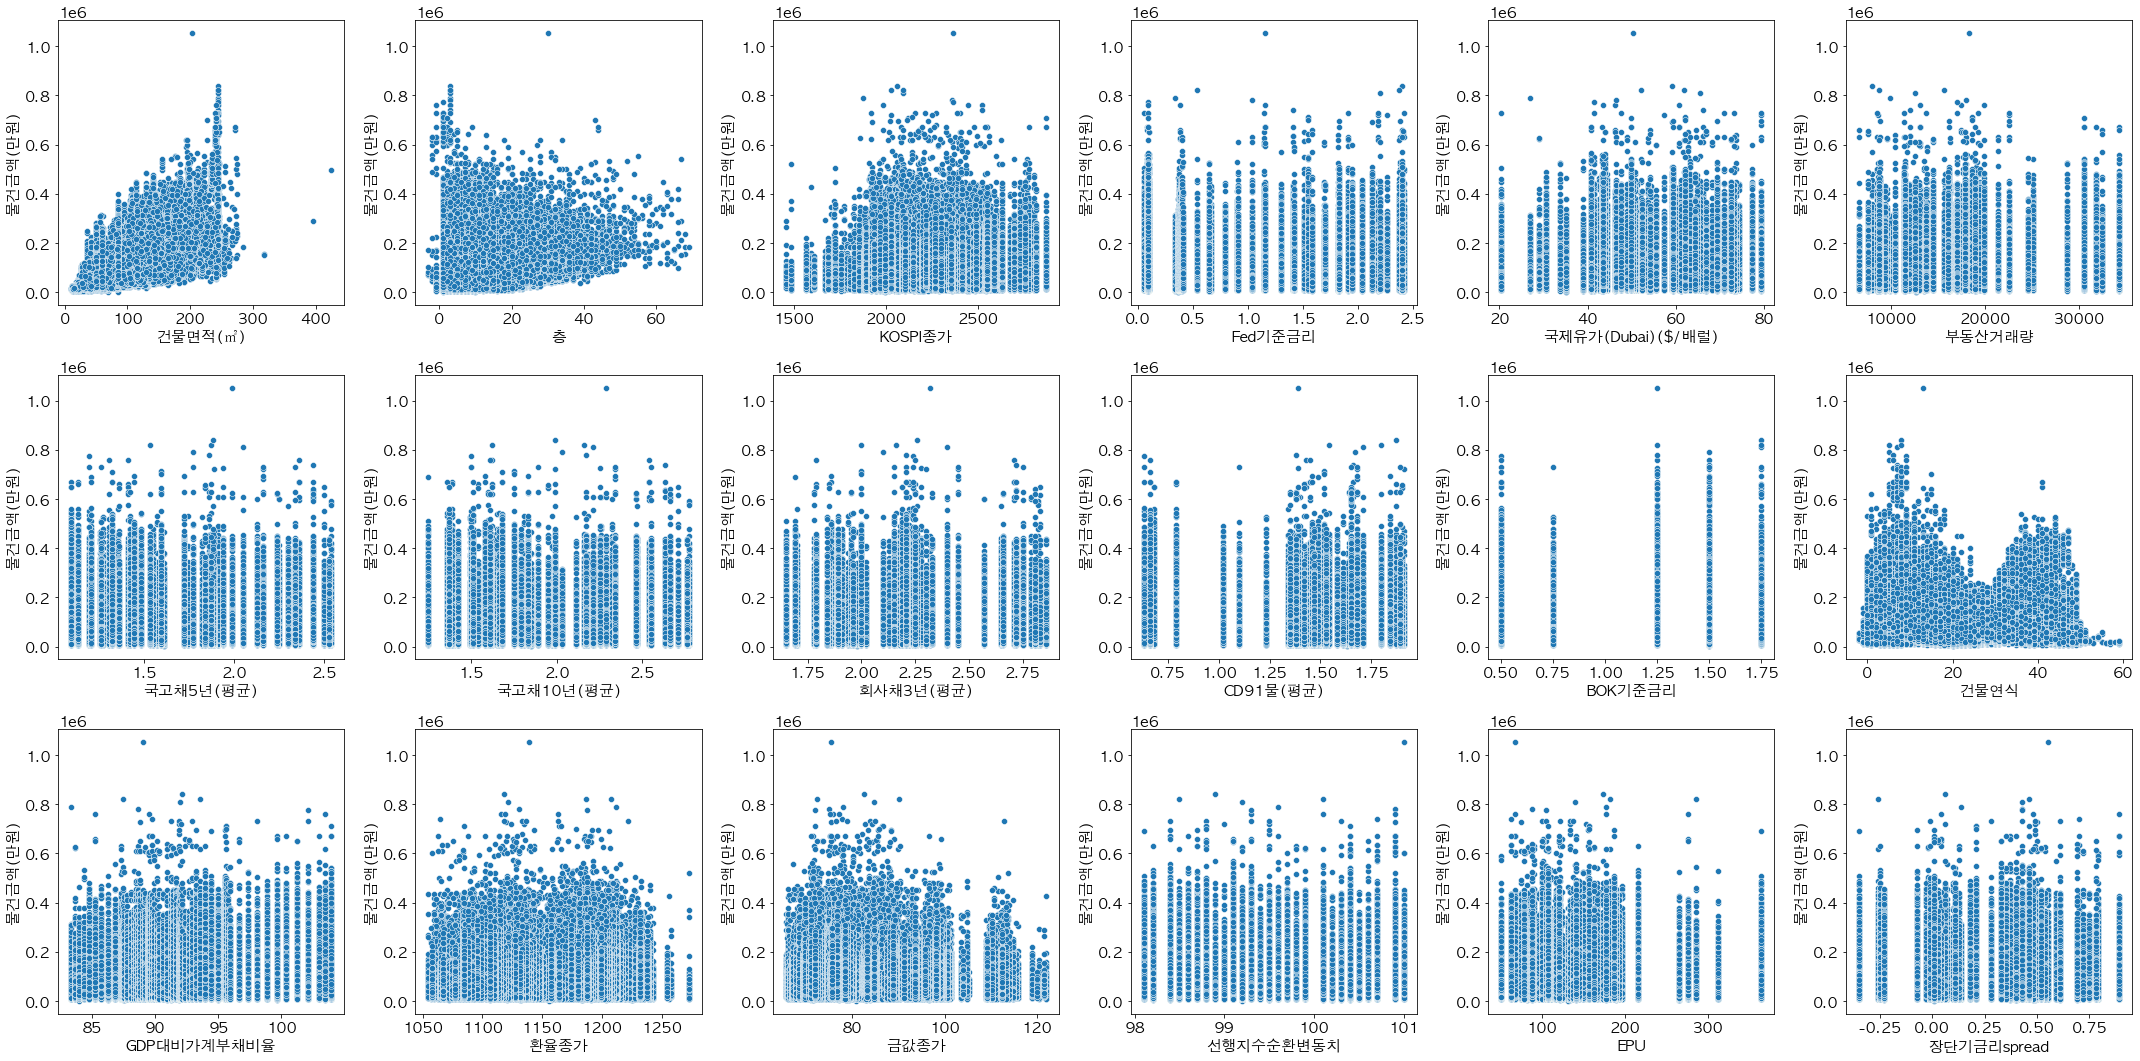

In [17]:
# 산점도 확인
col_n = 6
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train.columns):
    sns.scatterplot(x=X_train[col], y=y, ax=ax[int(i/col_n), int(i%col_n)])

fig.tight_layout()
plt.show()

# II. 통계적 검정 (스케일링 후)

In [18]:
# feature & target  split
X = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

# X_train : 숫자형 컬럼만 
X_train = X.select_dtypes([np.number])

In [19]:
# Scaling X -> minMax 
def myscaler(df):
    from sklearn.preprocessing import MinMaxScaler

    df_num = df.select_dtypes([np.number])
    num_col = list(df_num.columns)

    # Scaler 객체 생성
    scaler = MinMaxScaler()
    x_num_scaled = scaler.fit_transform(df_num)

    x_num_scaled = pd.DataFrame(x_num_scaled, columns=num_col)

    X_scaled = df.copy()
    for i in x_num_scaled:
        X_scaled[i] = x_num_scaled[i]

    return X_scaled

In [20]:
X_scaled = myscaler(X).select_dtypes([np.number])

In [21]:
# Scaling y -> 상용로그
y_scaled = np.log10(y)

In [22]:
# X_scaled랑 y_scaled 합친 데이터프레임
Xy_scaled = pd.concat([X_scaled, y], axis = 1)

## 1. 정규성

### 1-1. 정규성 - Shapiro & KS test

In [23]:
# Shapiro
from scipy import stats
for i in Xy_scaled.columns:
    a = stats.shapiro(Xy_scaled[i])
    p = a.pvalue   
    print(i,p)

건물면적(㎡) 0.0
층 0.0
KOSPI종가 0.0
Fed기준금리 0.0
국제유가(Dubai)($/배럴) 0.0
부동산거래량 0.0
국고채5년(평균) 0.0
국고채10년(평균) 0.0
회사채3년(평균) 0.0
CD91물(평균) 0.0
BOK기준금리 0.0
건물연식 0.0
GDP대비가계부채비율 0.0
환율종가 0.0
금값종가 0.0
선행지수순환변동치 0.0
EPU 0.0
장단기금리spread 0.0
물건금액(만원) 0.0


In [24]:
# KS
from scipy.stats import kstest
for i in Xy_scaled.columns:
    a = kstest(Xy_scaled[i],'norm')
    p = a.pvalue
    print(i,p)

건물면적(㎡) 0.0
층 0.0
KOSPI종가 0.0
Fed기준금리 0.0
국제유가(Dubai)($/배럴) 0.0
부동산거래량 0.0
국고채5년(평균) 0.0
국고채10년(평균) 0.0
회사채3년(평균) 0.0
CD91물(평균) 0.0
BOK기준금리 0.0
건물연식 0.0
GDP대비가계부채비율 0.0
환율종가 0.0
금값종가 0.0
선행지수순환변동치 0.0
EPU 0.0
장단기금리spread 0.0
물건금액(만원) 0.0


In [25]:
# 잔차 shapiro 
import statsmodels.api as sm
from scipy import stats

# OLS 모델로 회귀분석 수행
model = sm.OLS(y_scaled, X_scaled)
result = model.fit()

# 회귀 모델의 잔차
residuals = result.resid

# Shapiro-Wilk 검정을 통해 잔차의 정규성 검정
shapiro_test = stats.shapiro(residuals)
p_value = shapiro_test.pvalue

print("p-value:", p_value)

p-value: 0.0


In [26]:
# 잔차 ks

# OLS 모델로 회귀분석 수행
model = sm.OLS(y_scaled, X_scaled)
result = model.fit()

# 회귀 모델의 잔차
residuals = result.resid

# kstest 검정을 통해 잔차의 정규성 검정
ks_test = stats.kstest(residuals,'norm')
p_value = ks_test.pvalue

print("p-value:", p_value)

p-value: 0.0


### 1-2. 정규성 - QQ plot

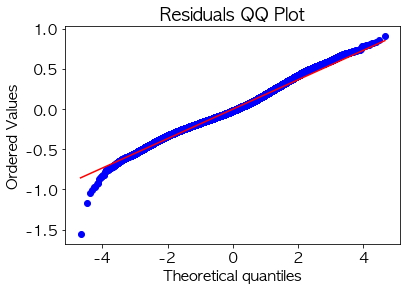

In [27]:
# 잔차 QQplot
import statsmodels.api as sm

# 회귀 모델 피팅
model = sm.OLS(y_scaled, sm.add_constant(X_scaled))
result = model.fit()

# 잔차 계산
residuals = result.resid

# 잔차의 QQ plot 그리기
fig, ax = plt.subplots()
stats.probplot(residuals, dist=stats.norm, plot=ax)
ax.set_title("Residuals QQ Plot")
plt.show()

## 2. 등분산성 - Residual plot

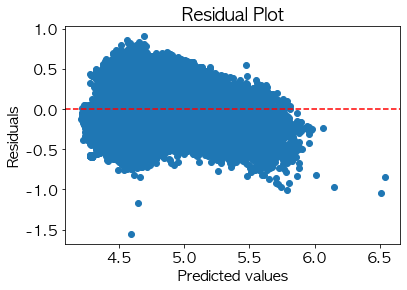

In [28]:
# 선형회귀 모델 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# 예측값과 잔차 계산
y_pred = model.predict(X_scaled)
residuals = y_scaled - y_pred

# 잔차 플롯 시각화
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [35]:
y_pred

array([4.39462571, 4.58781849, 4.61350033, ..., 4.97663004, 4.95411673,
       4.97168174])

## 3. 독립성 - Dubin Watson



In [29]:
## 독립성 검정
import statsmodels.api as sm

data_with_const = sm.add_constant(X_scaled, has_constant='add')

# 더빈-왓슨 검정
result = sm.OLS(y_scaled, data_with_const).fit()
dw_statistic = sm.stats.stattools.durbin_watson(result.resid)

# 결과 출력
print("Durbin-Watson 통계량:", dw_statistic)

# 자기상관 여부 결정
if dw_statistic < 2:
    print("양의 자기상관이 있다.")
elif dw_statistic > 2:
    print("음의 자기상관이 있다.")
else:
    print("자기상관이 없다.")

Durbin-Watson 통계량: 1.9579008274028042
양의 자기상관이 있다.


- 독립성 : 1.95로 정확히 2는 아니지만, 2와 매우 근사하기에 독립성 즉, 자기상관이 없는 것으로 판단 가능

## 4. 선형성 - Scatter Plot & QQ-plot

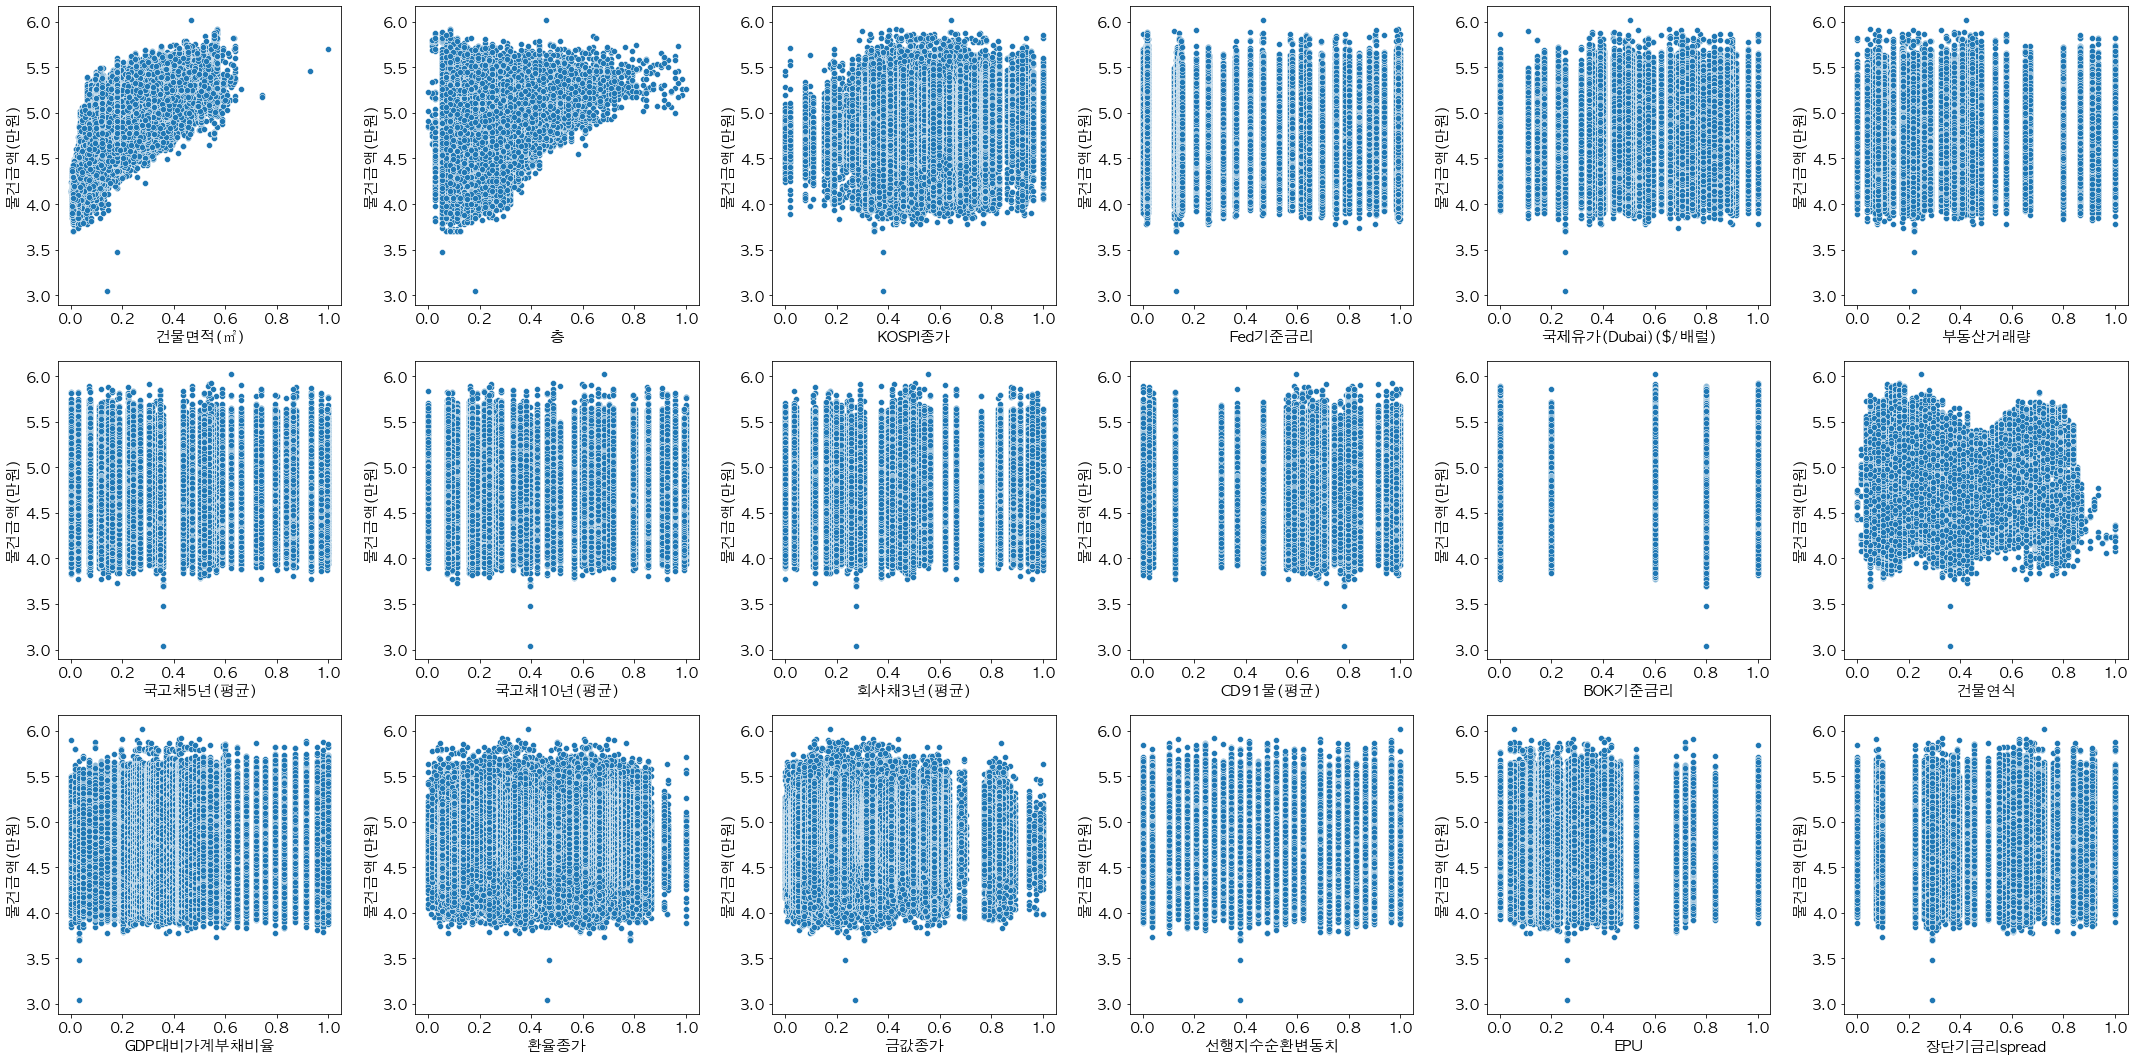

In [30]:
# Scatter plot
col_n = 6
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_scaled.columns):
    sns.scatterplot(x=X_scaled[col], y=y_scaled, ax=ax[int(i/col_n), int(i%col_n)])

fig.tight_layout()
plt.show()

In [34]:
Xy_scaled

,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),회사채3년(평균),CD91물(평균),BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,금값종가,선행지수순환변동치,EPU,장단기금리spread,물건금액(만원)
0,0.072266,0.180556,0.355742,0.122363,0.110169,0.121612,0.468966,0.513158,0.371901,0.812500,0.8,0.442623,0.0,0.553916,0.197833,0.517241,0.403866,0.395161,18000
1,0.157736,0.180556,0.355742,0.122363,0.110169,0.121612,0.468966,0.513158,0.371901,0.812500,0.8,0.459016,0.0,0.553916,0.197833,0.517241,0.403866,0.395161,55200
2,0.180570,0.083333,0.355742,0.122363,0.110169,0.121612,0.468966,0.513158,0.371901,0.812500,0.8,0.262295,0.0,0.553916,0.197833,0.517241,0.403866,0.395161,36800
3,0.221941,0.166667,0.355742,0.122363,0.110169,0.121612,0.468966,0.513158,0.371901,0.812500,0.8,0.131148,0.0,0.553916,0.197833,0.517241,0.403866,0.395161,67600
4,0.179990,0.180556,0.355742,0.122363,0.110169,0.121612,0.468966,0.513158,0.371901,0.812500,0.8,0.459016,0.0,0.553916,0.197833,0.517241,0.403866,0.395161,30300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453165,0.179290,0.083333,1.000000,0.016878,0.498305,0.866137,0.158621,0.282895,0.462810,0.023438,0.0,0.098361,1.0,0.135733,0.111703,0.793103,0.181199,0.653226,171000
453166,0.120589,0.069444,1.000000,0.016878,0.498305,0.866137,0.158621,0.282895,0.462810,0.023438,0.0,0.344262,1.0,0.135733,0.111703,0.793103,0.181199,0.653226,47000
453167,0.179073,0.138889,1.000000,0.016878,0.498305,0.866137,0.158621,0.282895,0.462810,0.023438,0.0,0.180328,1.0,0.135733,0.111703,0.793103,0.181199,0.653226,175000
453168,0.180232,0.055556,1.000000,0.016878,0.498305,0.866137,0.158621,0.282895,0.462810,0.023438,0.0,0.295082,1.0,0.135733,0.111703,0.793103,0.181199,0.653226,59700


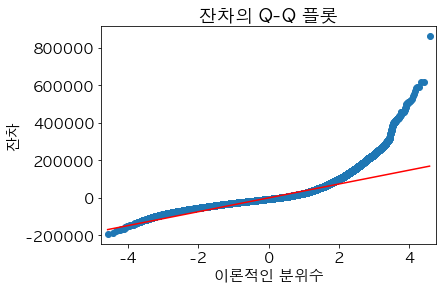

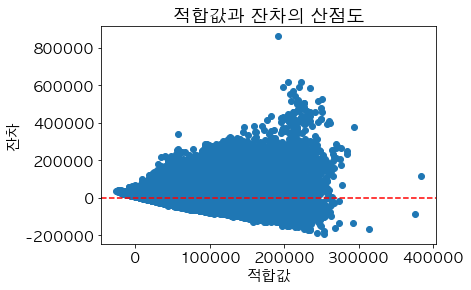

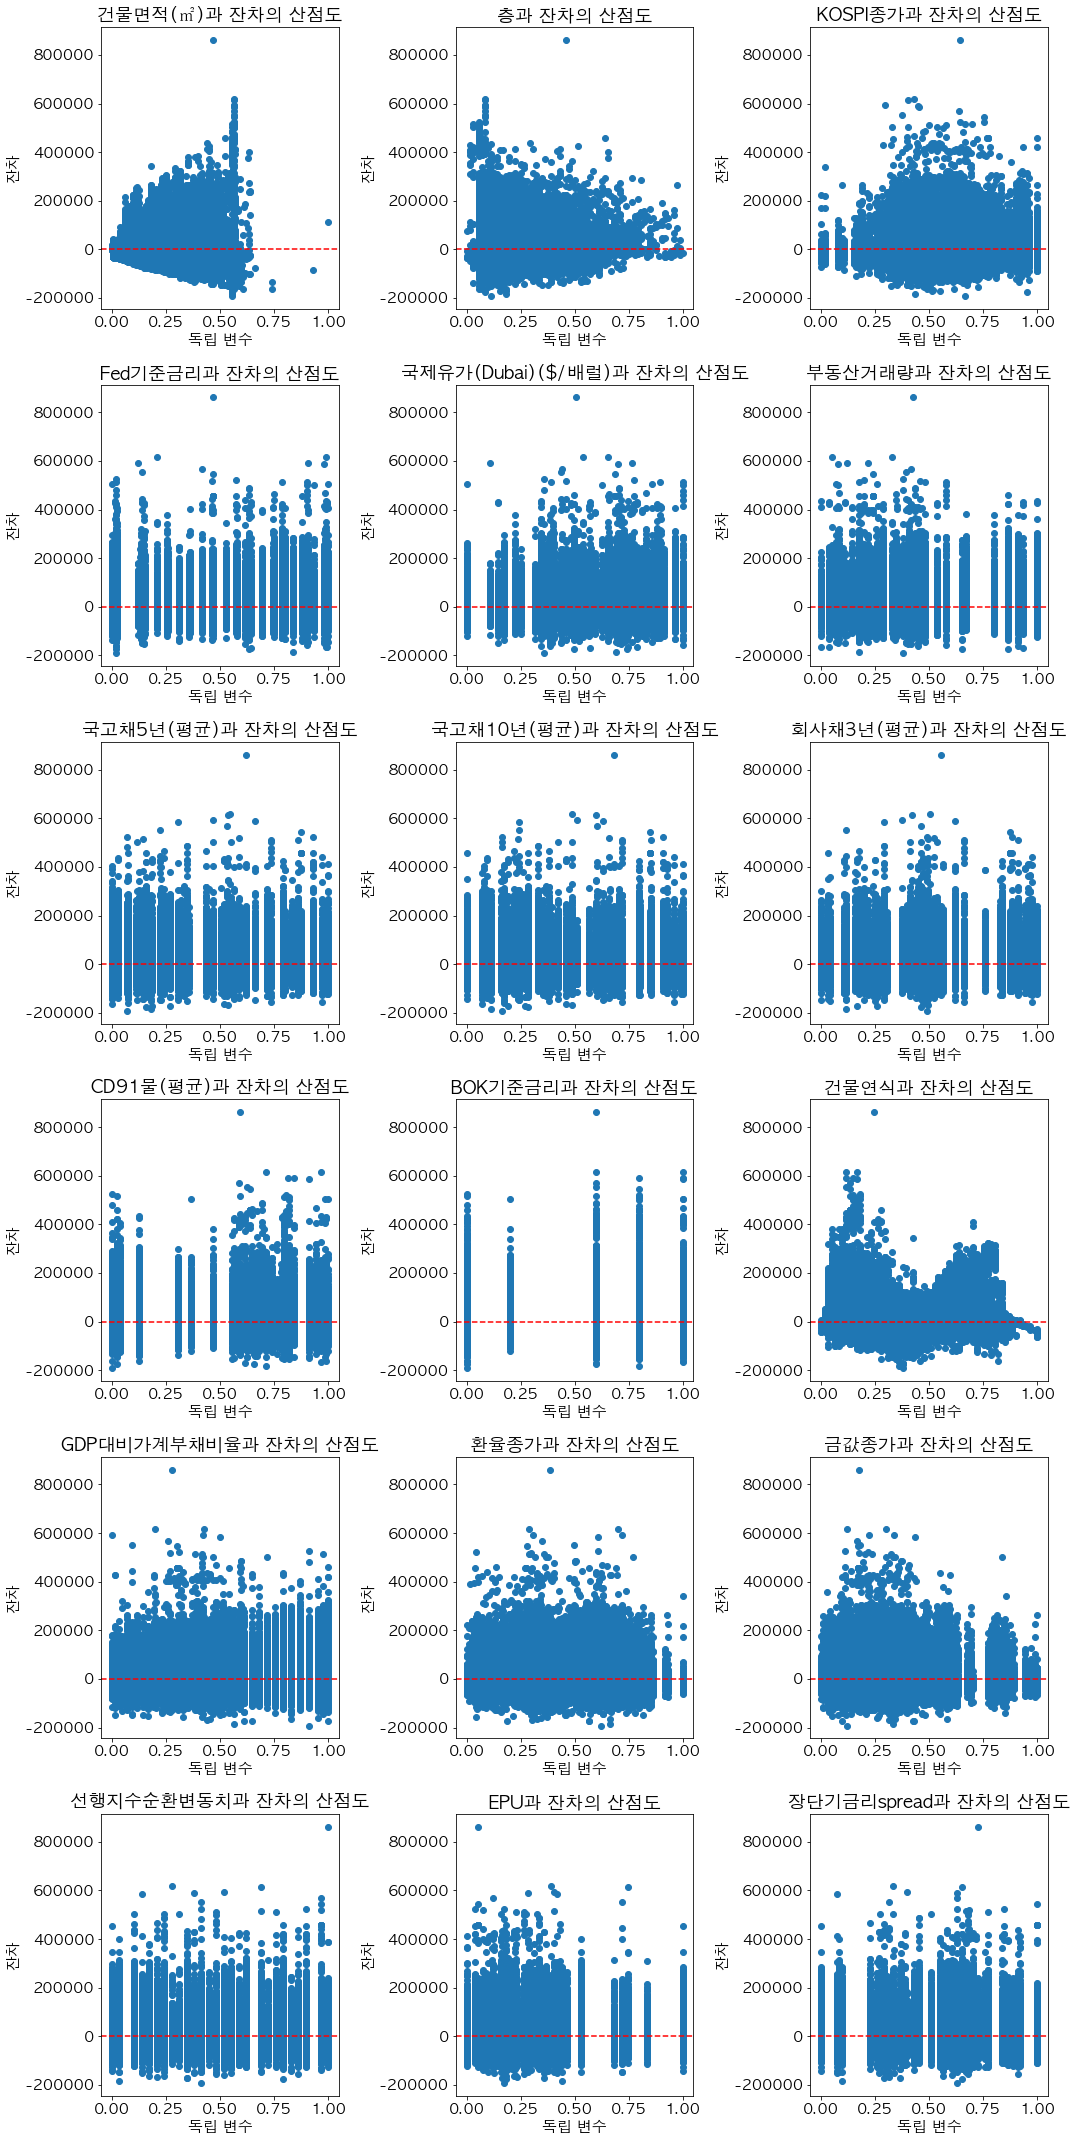

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = Xy_scaled.iloc[:,:-1]
y = Xy_scaled.iloc[:,-1]

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('적합값')
plt.ylabel('잔차')
plt.title('적합값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()

----